# Filtered Backprojection

In [10]:
import numpy as np
import odl
import matplotlib.pyplot as plt

In [11]:
reco_space = odl.uniform_discr(
    min_pt=[-1, -1], max_pt=[1, 1], shape=[300, 300], dtype='float32')

In [12]:
p=180
q=512
L=np.sqrt(2)
limited_view=0.5
angle_partition = odl.uniform_partition(0, np.pi*limited_view, 180)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-L, L, int(L*q))
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

Filtered backprojection. Note that this is not implemented nicely. We should do this as a convolution, and we should respect the filter cutoff.

In [13]:
fourier = odl.trafos.FourierTransform(ray_trafo.range, axes=[1])
ramp_function = fourier.range.element(lambda x: np.abs(x[1]) / (2 * np.pi))
ramp_filter = fourier.inverse * ramp_function * fourier
fbp = ray_trafo.adjoint * ramp_filter

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


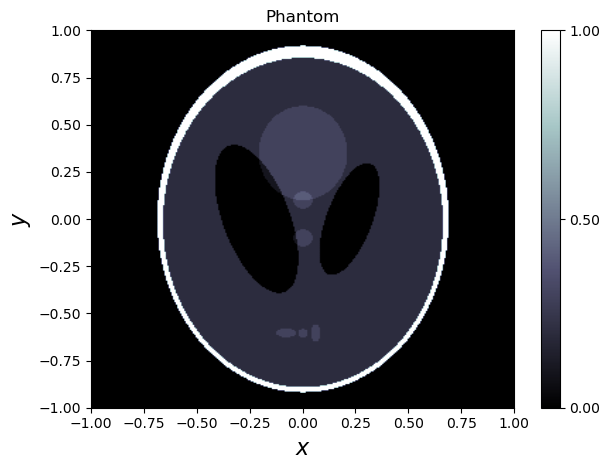

<Figure size 640x480 with 0 Axes>

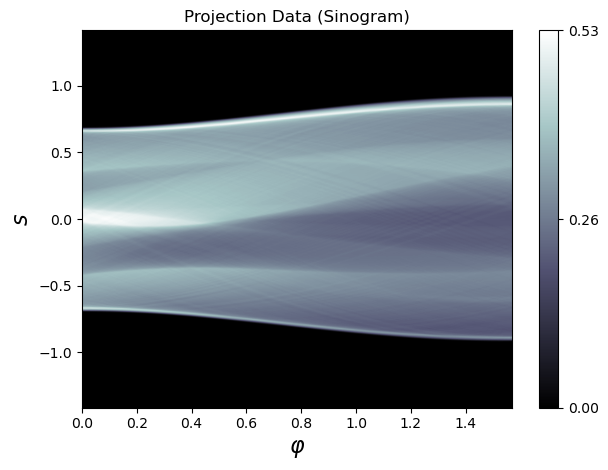

<Figure size 640x480 with 0 Axes>

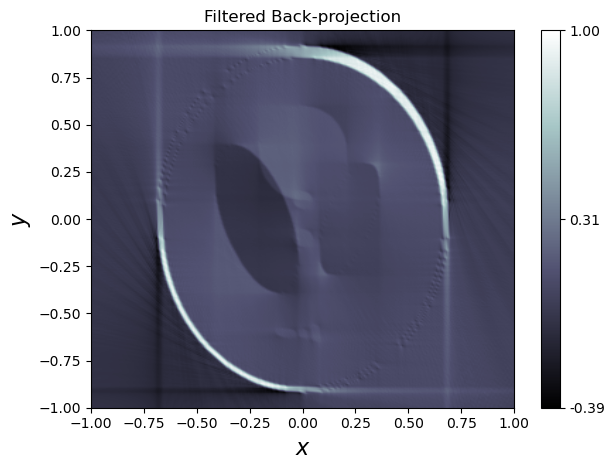

<Figure size 640x480 with 0 Axes>

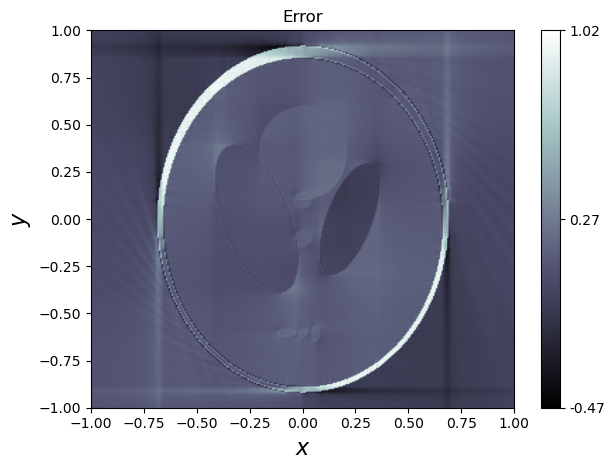

<Figure size 640x480 with 0 Axes>

In [14]:
phantom = odl.phantom.shepp_logan(reco_space, modified=True)
proj_data = ray_trafo(phantom)
fbp_reconstruction = fbp(proj_data)

phantom.show(title='Phantom')
proj_data.show(title='Projection Data (Sinogram)')
fbp_reconstruction.show(title='Filtered Back-projection')
(phantom - fbp_reconstruction).show(title='Error', force_show=True);